In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [16]:
data = pd.read_csv("output.csv")
data = data.dropna()
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data = data.drop(columns=categorical_cols)

In [17]:
data

,label,url_length,starts_with_ip,url_entropy,has_punycode,digit_letter_ratio,dot_count,at_count,dash_count,tld_count,domain_has_digits,subdomain_count,nan_char_entropy,has_internal_links,domain_age_days
0,True,52,False,4.505460,False,0.285714,5,0,2,0,False,4,0.324857,False,9526.0
1,True,15,False,3.506891,False,0.000000,1,0,1,0,False,0,0.260459,False,7529.0
2,False,29,False,3.978334,False,0.000000,2,0,0,0,False,1,0.772172,False,1467.0
3,False,37,False,3.992709,False,0.000000,2,0,0,0,False,1,0.662212,False,4141.0
4,False,65,False,4.670209,False,0.567568,3,0,0,0,False,2,0.502258,False,3922.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174926,True,8,False,2.750000,False,0.000000,1,0,0,0,False,0,0.375000,False,355.0
174927,False,172,True,5.726601,False,0.194030,4,0,0,0,True,0,0.425088,False,5774.0
174928,True,15,False,3.373557,False,0.000000,2,0,0,0,False,1,0.387585,False,9502.0
174929,True,15,False,3.640224,False,0.300000,2,0,0,0,False,1,0.387585,False,7916.0


In [18]:
X = data.drop('label', axis=1)
y = data['label'].astype(int)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [21]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

c:\Users\koval\DataAnalysisLab3\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


Epoch 1/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9778 - loss: 0.0617 - val_accuracy: 1.0000 - val_loss: 3.0140e-04
Epoch 2/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9999 - val_loss: 2.9526e-04
Epoch 3/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 1.0505e-04
Epoch 4/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9998 - loss: 7.6194e-04 - val_accuracy: 1.0000 - val_loss: 4.9153e-05
Epoch 5/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9998 - loss: 9.0002e-04 - val_accuracy: 1.0000 - val_loss: 2.0740e-04
Epoch 6/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9998 - loss: 5.2462e-04 - val_accuracy: 1.0000 - val_loss: 1.4212e-07
Epoch 7/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9999 - loss: 7.1273e-04 - val_accuracy: 1.0000 - val_loss: 1.3342e-06
Epoch 8/20
4374/4374 ━━━━━━━━━━━━━━━━━━━━ 5s 1

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - accuracy: 0.9999 - loss: 2.7458e-04
Test Accuracy: 99.99%


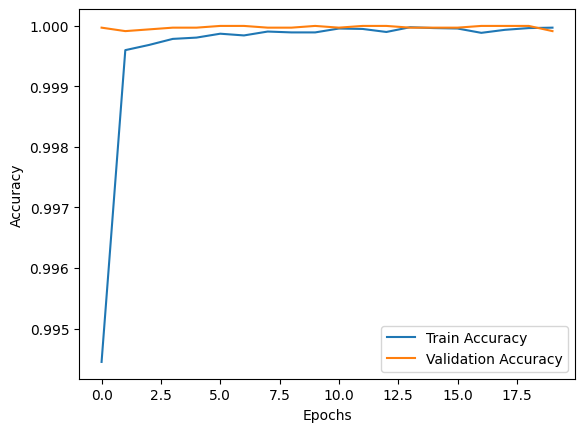

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
